# Primer on Python - Part 2 of 3

In this second part, we will use the **seaborn** library to plot data.

Seaborn is a popular data visualization library, with streamlined functions and pretty themes, and it is designed to work with the Pandas library. It has some of the useful features from R's ggplot which are not very easy to create in matplotlib.

Seaborn is an extension of the matplotlib library (see part 3), and has similar underlying grammar, which makes it a bit clunky when it comes to customisation and exporting.

In [2]:
# Starting afresh, let's import the required libraries and read the data we put together in Part 1

import pandas as pd
import seaborn as sns

project = '~/Desktop/Cognestic/'
inpath = project + 'outputs/'

df = pd.read_csv(inpath + 'events_16sub.csv')

df.head()

,onset,duration,circle_duration,stim_type,trigger,button_pushed,response_time,stim_file,subject,run
0,9.838,0.968,0.597,UNFAMILIAR,14,4.0,0.930,func/u014.bmp,sub-01,1
1,132.144,0.980,0.498,FAMOUS,5,7.0,0.898,func/f014.bmp,sub-01,1
2,147.946,0.897,0.445,FAMOUS,7,7.0,0.767,func/f009.bmp,sub-01,1
3,183.058,0.981,0.467,SCRAMBLED,17,7.0,0.872,func/s001.bmp,sub-01,1
4,186.365,0.880,0.559,SCRAMBLED,18,7.0,1.000,func/s001.bmp,sub-01,1


# 1. Visualising distributions

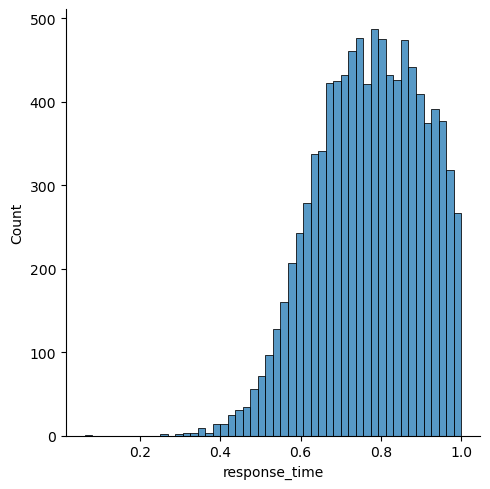

In [4]:
# Basic histogram

sns.displot(data=df, x='response_time')

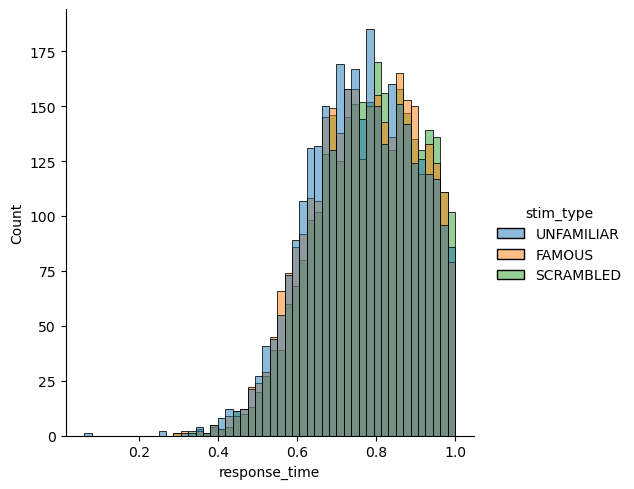

In [5]:
# Colour by stimulus type

sns.displot(data=df, x='response_time', hue='stim_type')

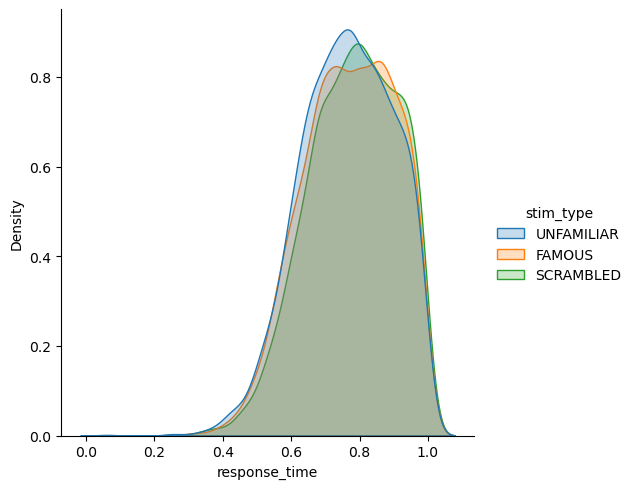

In [6]:
# KDE plot

sns.displot(data=df, x='response_time', hue='stim_type', kind='kde', fill=True)

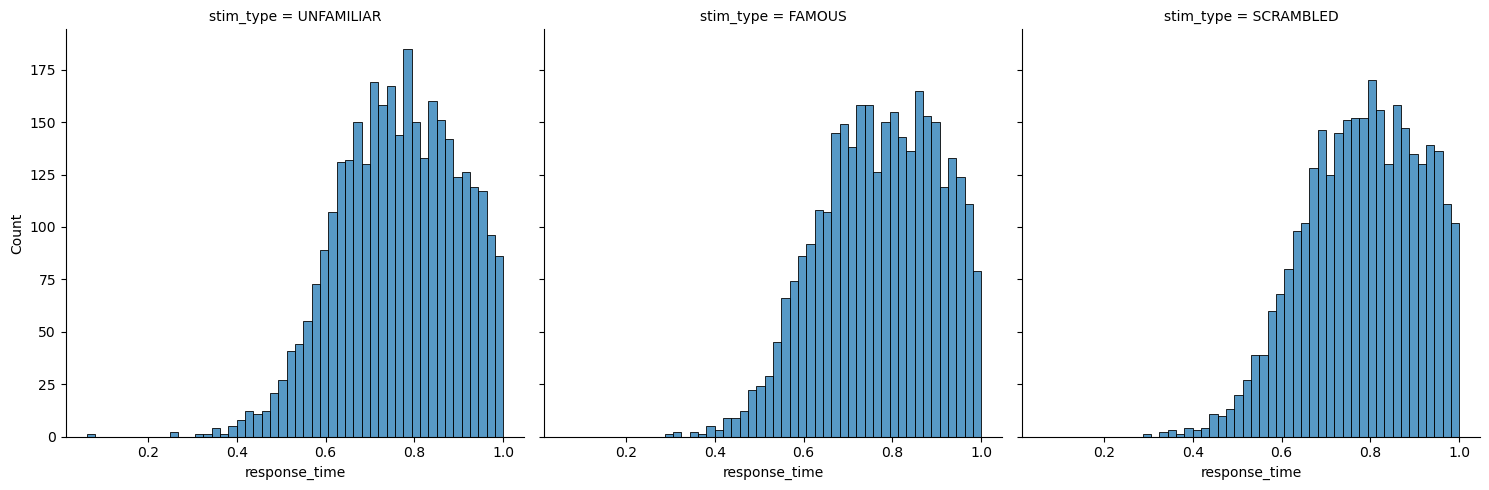

In [7]:
# Alternatively, plot each stimulus type separately

sns.displot(data=df, x='response_time', col='stim_type') # Remeber col is column not colour, you can also use "row"

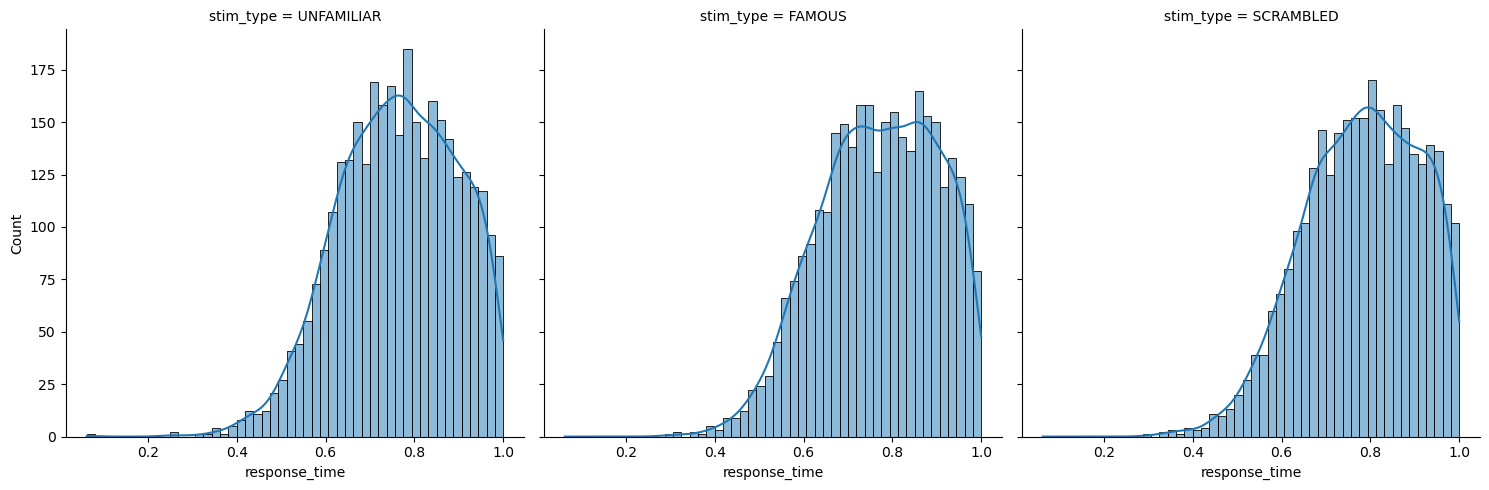

In [8]:
# Add a smoothed KDE curve

sns.displot(data=df, x='response_time', col='stim_type', kde=True)

# 2. Categorical plots

## Boxplots

<Axes: xlabel='stim_type', ylabel='response_time'>

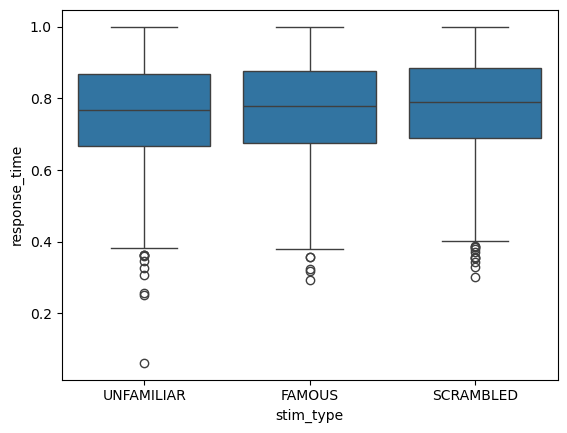

In [11]:
# A basic boxplot: reaction times by stimulus types

sns.boxplot(data=df, x='stim_type', y='response_time')

<Axes: xlabel='stim_type', ylabel='response_time'>

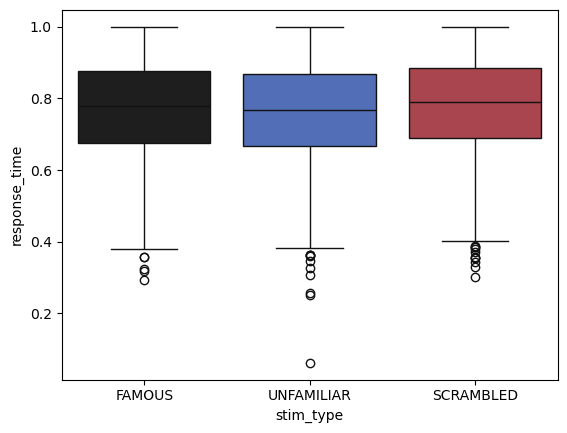

In [12]:
# Change colours and order of categories

sns.boxplot(data=df, x='stim_type', y='response_time', 
            hue='stim_type', palette='icefire', 
            order=['FAMOUS', 'UNFAMILIAR', 'SCRAMBLED'])

<Axes: xlabel='stim_type', ylabel='response_time'>

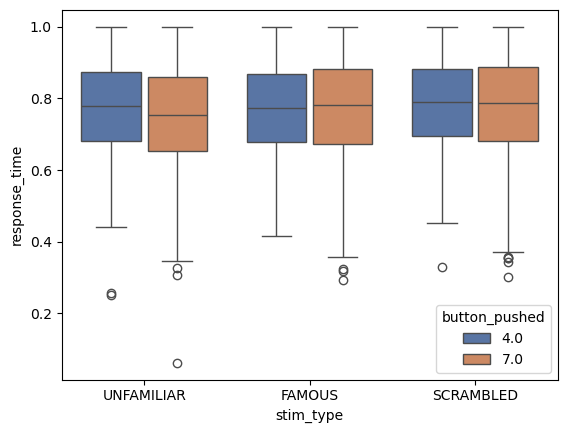

In [13]:
# Group by which button was pressed

sns.boxplot(data=df, x='stim_type', y='response_time', hue='button_pushed', gap=.1, palette='deep')

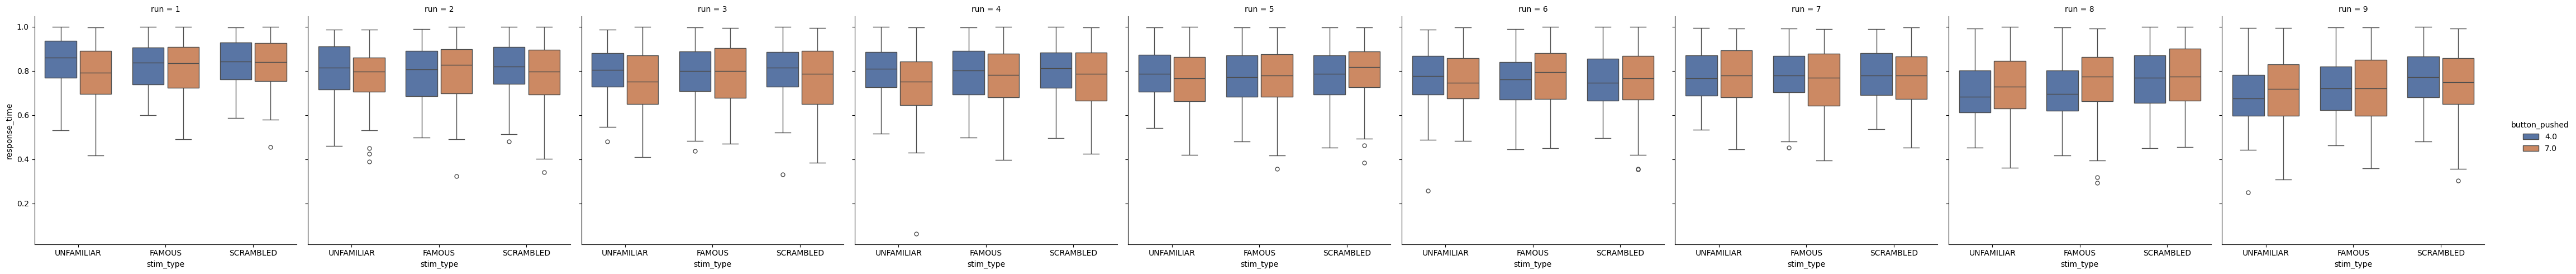

In [14]:
# But to add further dimensions in the form of facets, we have to switch to the more generic catplot()

sns.catplot(data=df, x='stim_type', y='response_time', hue='button_pushed', gap=.1, palette='deep', kind='box', col='run')

[Text(0.5, 1.0, 'Wakeman fMRI Task'), Text(0, 0.5, 'RT'), Text(0.5, 0, '')]

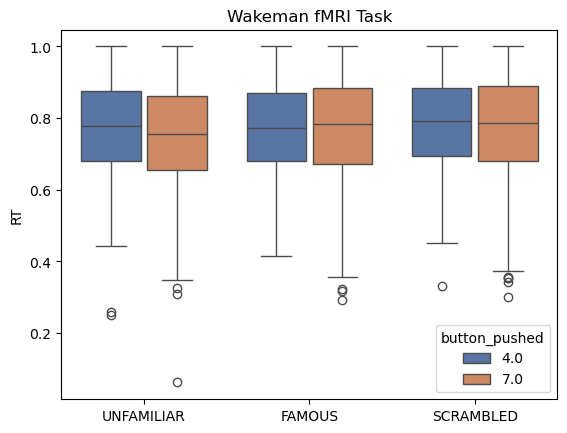

In [15]:
# Edit the labels

ax = sns.boxplot(data=df, x='stim_type', y='response_time', hue='button_pushed', gap=.1, palette='deep')

ax.set(title='Wakeman fMRI Task', ylabel='RT', xlabel='')

## Violin plots

<Axes: xlabel='stim_type', ylabel='response_time'>

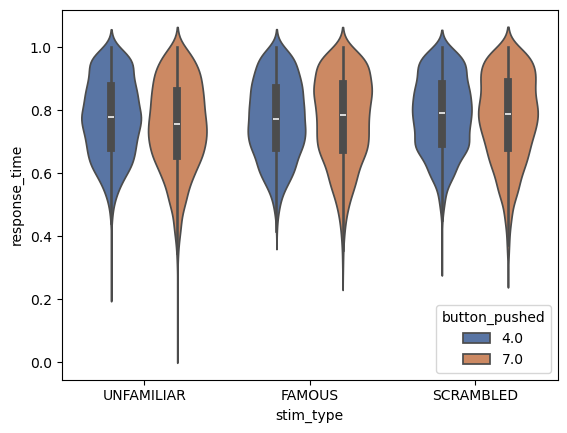

In [17]:
# Violin plots work similarly

sns.violinplot(data=df, x='stim_type', y='response_time', hue='button_pushed', gap=.1, palette='deep')

<Axes: xlabel='stim_type', ylabel='response_time'>

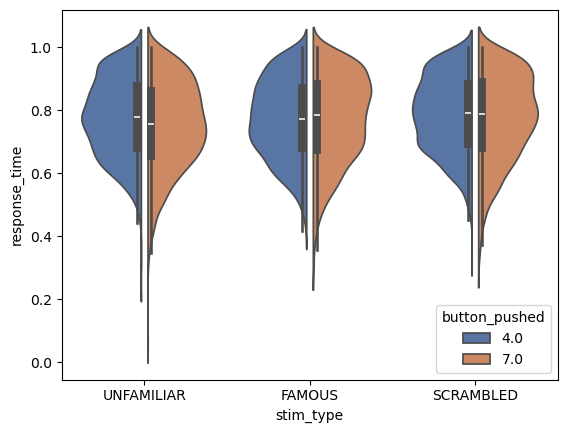

In [18]:
# Split violins

sns.violinplot(data=df, x='stim_type', y='response_time', hue='button_pushed', gap=.1, palette='deep', split=True)

<Axes: xlabel='stim_type', ylabel='response_time'>

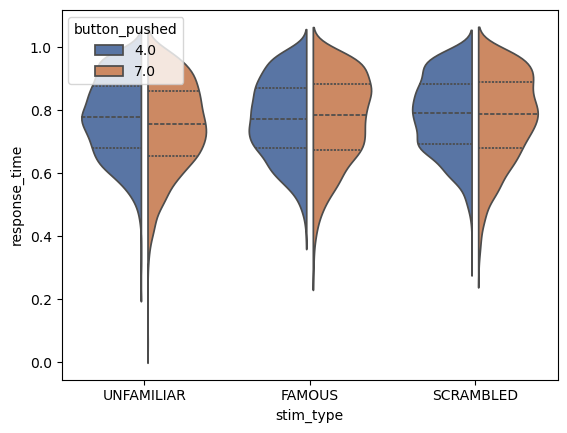

In [19]:
# Change inner boxplot to lines

sns.violinplot(data=df, x='stim_type', y='response_time', hue='button_pushed',
               gap=.1, palette='deep',
               split=True, inner='quart')

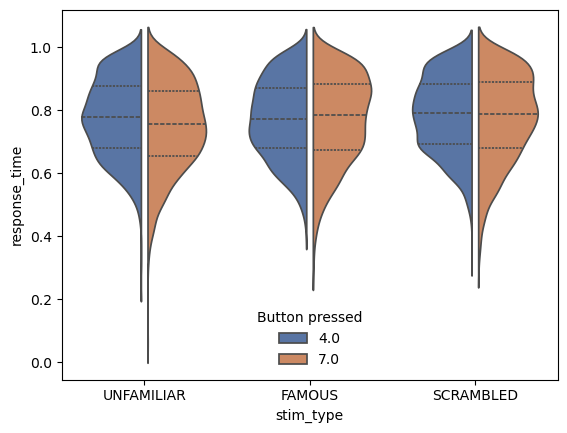

In [20]:
# Edit the legend

ax = sns.violinplot(data=df, x='stim_type', y='response_time', hue='button_pushed', gap=.1, palette='deep', split=True, inner='quart')

ax.legend(loc='lower center', title='Button pressed', frameon=False)

# 3. Combining types of plots

<Axes: xlabel='stim_type', ylabel='response_time'>

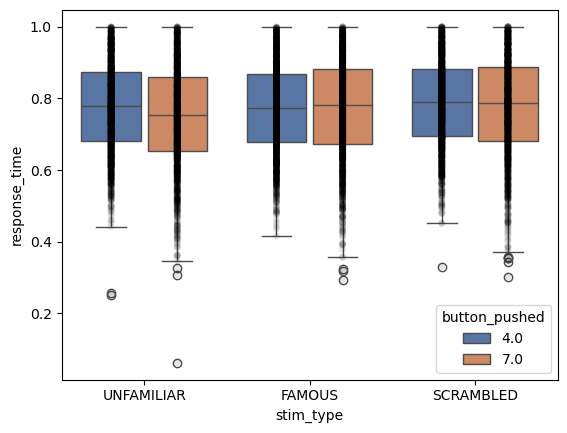

In [22]:
# Add a strip plot on top of a boxplot

sns.boxplot(data=df, x='stim_type', y='response_time', hue='button_pushed', gap=.1, palette='deep')
sns.stripplot(data=df, x='stim_type', y='response_time', hue='button_pushed', dodge=True, jitter=False, palette=['black', 'black'], alpha=0.1, legend=False)

# 4. Export to external file

We will use the savefig() function from the matplotlib.pyplot library

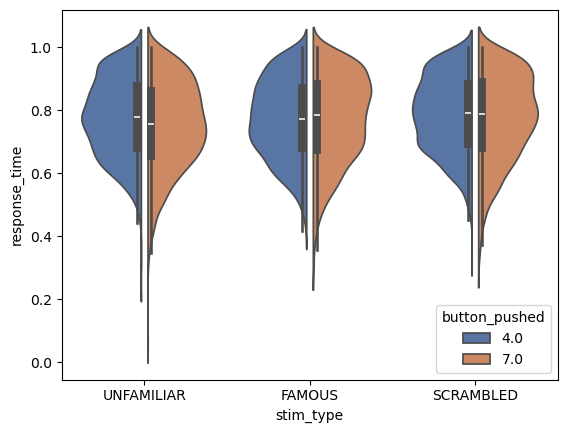

In [24]:
# Import library
import matplotlib.pyplot as plt

# Plot data
sns.violinplot(data=df, x='stim_type', y='response_time', hue='button_pushed', gap=.1, palette='deep', split=True)

# Save as png file
plt.savefig('figures/example_violin_plot.png') # This must be a relative path to avoid importing more libraries

# Or other formats
plt.savefig('figures/example_violin_plot.jpg')
plt.savefig('figures/example_violin_plot.svg', format='svg')
plt.savefig('figures/example_violin_plot.pdf', format='pdf')

# **Putting it all together**

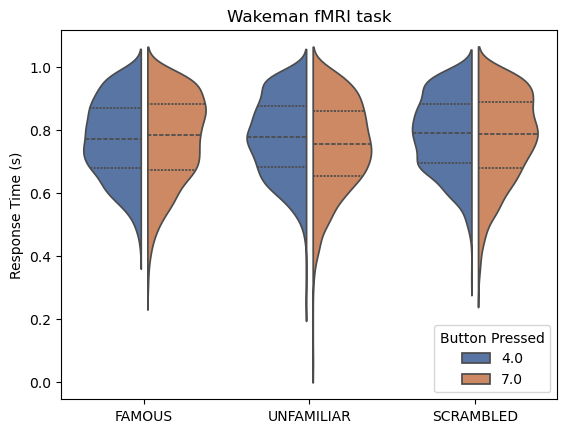

In [26]:
# --- Libraries --- #

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Get data --- #

project = '~/Desktop/Cognestic/'
inpath = project + 'outputs/'

df = pd.read_csv(inpath + 'events_16sub.csv')

# --- Plot data and export --- #

ax = sns.violinplot(data=df, x='stim_type', y='response_time', hue='button_pushed', gap=.1, 
                     palette='deep', split=True, inner='quart',
                     order=['FAMOUS', 'UNFAMILIAR', 'SCRAMBLED'])
ax.set(title='Wakeman fMRI task', ylabel='Response Time (s)', xlabel='')
ax.legend(title='Button Pressed', loc='lower right')

plt.savefig('figures/a_violin_plot.png')